In [31]:
import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference import SNLE, prepare_for_sbi, simulate_for_sbi
from sbi.inference.base import infer

In [32]:
def MA2(params, n_obs=100, batch_size=1, random_state=None):
    r"""Generate a sequence of samples from the MA2 model.

    The sequence is a moving average

        x_i = w_i + \theta_1 w_{i-1} + \theta_2 w_{i-2}

    where w_i are white noise ~ N(0,1).

    Parameters
    ----------
    t1 : float, array_like
    t2 : float, array_like
    n_obs : int, optional
    batch_size : int, optional
    random_state : RandomState, optional

    """
    # Make inputs 2d arrays for broadcasting with w
    print('params', params.shape)
    print('params[0]', params[0])
    if isinstance(params, torch.Tensor):
        t1, t2 = float(params[0][0]), float(params[0][1])
    else:
        t1, t2 = params[0], params[1]
    random_state = random_state or np.random

    # i.i.d. sequence ~ N(0,1)
    w = random_state.randn(batch_size, n_obs + 2)
    x = w[:, 2:] + t1 * w[:, 1:-1] + t2 * w[:, :-2]
    return x


In [33]:
def simulation_wrapper(params):
    x_sim = MA2(params)
    sim_sum = torch.as_tensor(x_sim.astype('float32'))
    return sim_sum.reshape((-1, 100))  # TODO: magic number 100

In [34]:
# TODO: ACTUAL PRIOR?
prior_min = [-1, -1]
prior_max = [1, 1]
prior = utils.torchutils.BoxUniform(low=torch.as_tensor(prior_min),
                                    high=torch.as_tensor(prior_max))

/Users/ryankelly/python_projects/sbi/venv/lib/python3.9/site-packages/sbi-0.18.0-py3.9.egg/sbi/utils/torchutils.py:27: UserWarning: GPU was selected as a device for training the neural network. Note that we expect **no** significant speed ups in training for the default architectures we provide. Using the GPU will be effective only for large neural networks with operations that are fast on the GPU, e.g., for a CNN or RNN `embedding_net`.
  warnings.warn(


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
inference = SNLE(prior=prior)

In [ ]:
true_params = np.array([.6, .2])
y = MA2(true_params)

num_rounds = 30

posteriors = []
proposal = prior

for _ in range(num_rounds):
    theta, x = simulate_for_sbi(simulation_wrapper, proposal, num_simulations=1000)
    density_estimator = inference.append_simulations(theta, x
    ).train()
    posterior = inference.build_posterior(density_estimator)
    posteriors.append(posterior)
    proposal = posterior.set_default_x(y)


params (2,)
params[0] 0.6


Running 1000 simulations.:   7%|▋         | 66/1000 [00:00<00:01, 657.14it/s]

params torch.Size([1, 2])
params[0] tensor([-0.5143,  0.7408])
params torch.Size([1, 2])
params[0] tensor([0.9222, 0.7249])
params torch.Size([1, 2])
params[0] tensor([0.9751, 0.4765])
params torch.Size([1, 2])
params[0] tensor([0.7521, 0.0745])
params torch.Size([1, 2])
params[0] tensor([-0.7275, -0.2789])
params torch.Size([1, 2])
params[0] tensor([ 0.6807, -0.5012])
params torch.Size([1, 2])
params[0] tensor([0.8047, 0.5374])
params torch.Size([1, 2])
params[0] tensor([-0.8650,  0.4279])
params torch.Size([1, 2])
params[0] tensor([-0.2665,  0.0201])
params torch.Size([1, 2])
params[0] tensor([ 0.7024, -0.6222])
params torch.Size([1, 2])
params[0] tensor([-0.9084, -0.1276])
params torch.Size([1, 2])
params[0] tensor([-0.9302,  0.8880])
params torch.Size([1, 2])
params[0] tensor([-0.6496,  0.8083])
params torch.Size([1, 2])
params[0] tensor([ 0.4796, -0.9344])
params torch.Size([1, 2])
params[0] tensor([0.6220, 0.7728])
params torch.Size([1, 2])
params[0] tensor([0.3634, 0.4373])
para

Running 1000 simulations.:  20%|██        | 203/1000 [00:00<00:01, 627.19it/s]

params torch.Size([1, 2])
params[0] tensor([-0.3444,  0.5963])
params torch.Size([1, 2])
params[0] tensor([0.1287, 0.4577])
params torch.Size([1, 2])
params[0] tensor([-0.7094, -0.4234])
params torch.Size([1, 2])
params[0] tensor([0.8084, 0.7379])
params torch.Size([1, 2])
params[0] tensor([0.4102, 0.8573])
params torch.Size([1, 2])
params[0] tensor([-0.8832, -0.9858])
params torch.Size([1, 2])
params[0] tensor([-0.2556, -0.3583])
params torch.Size([1, 2])
params[0] tensor([0.9872, 0.2419])
params torch.Size([1, 2])
params[0] tensor([-0.9100,  0.0305])
params torch.Size([1, 2])
params[0] tensor([ 0.3854, -0.4407])
params torch.Size([1, 2])
params[0] tensor([ 0.6692, -0.1445])
params torch.Size([1, 2])
params[0] tensor([ 0.0902, -0.8123])
params torch.Size([1, 2])
params[0] tensor([0.9228, 0.3120])
params torch.Size([1, 2])
params[0] tensor([0.3347, 0.5706])
params torch.Size([1, 2])
params[0] tensor([-0.6442, -0.9341])
params torch.Size([1, 2])
params[0] tensor([0.9681, 0.7950])
params

Running 1000 simulations.:  38%|███▊      | 381/1000 [00:00<00:00, 785.86it/s]

tensor([0.6268, 0.8064])
params torch.Size([1, 2])
params[0] tensor([-0.5675,  0.5036])
params torch.Size([1, 2])
params[0] tensor([-0.1474,  0.0656])
params torch.Size([1, 2])
params[0] tensor([ 0.4304, -0.8025])
params torch.Size([1, 2])
params[0] tensor([-0.8424, -0.9023])
params torch.Size([1, 2])
params[0] tensor([-0.0228, -0.8040])
params torch.Size([1, 2])
params[0] tensor([ 0.4967, -0.6727])
params torch.Size([1, 2])
params[0] tensor([-0.8284,  0.5251])
params torch.Size([1, 2])
params[0] tensor([0.9229, 0.0319])
params torch.Size([1, 2])
params[0] tensor([-0.6221,  0.7037])
params torch.Size([1, 2])
params[0] tensor([ 0.0494, -0.3951])
params torch.Size([1, 2])
params[0] tensor([-0.6848, -0.2397])
params torch.Size([1, 2])
params[0] tensor([-0.6307, -0.1584])
params torch.Size([1, 2])
params[0] tensor([-0.4006,  0.4403])
params torch.Size([1, 2])
params[0] tensor([ 0.8999, -0.0227])
params torch.Size([1, 2])
params[0] tensor([-0.4765,  0.4442])
params torch.Size([1, 2])
params

Running 1000 simulations.:  46%|████▌     | 460/1000 [00:00<00:01, 461.73it/s]

 torch.Size([1, 2])
params[0] tensor([ 0.2751, -0.5854])
params torch.Size([1, 2])
params[0] tensor([-0.3919,  0.6363])
params torch.Size([1, 2])
params[0] tensor([-0.4315,  0.5185])
params torch.Size([1, 2])
params[0] tensor([ 0.9958, -0.1995])
params torch.Size([1, 2])
params[0] tensor([ 0.0870, -0.7374])
params torch.Size([1, 2])
params[0] tensor([-0.4476,  0.3922])
params torch.Size([1, 2])
params[0] tensor([0.0677, 0.8606])
params torch.Size([1, 2])
params[0] tensor([0.1681, 0.9668])
params torch.Size([1, 2])
params[0] tensor([-0.4913,  0.0544])
params torch.Size([1, 2])
params[0] tensor([ 0.0022, -0.1348])
params torch.Size([1, 2])
params[0] tensor([-0.3090, -0.5274])
params torch.Size([1, 2])
params[0] tensor([ 0.3463, -0.7968])
params torch.Size([1, 2])
params[0] tensor([-0.8988, -0.4039])
params torch.Size([1, 2])
params[0] tensor([0.8225, 0.9941])
params torch.Size([1, 2])
params[0] tensor([0.4250, 0.4924])
params torch.Size([1, 2])
params[0] tensor([-0.8695,  0.8485])
params

Running 1000 simulations.:  57%|█████▋    | 570/1000 [00:01<00:01, 365.06it/s]

params torch.Size([1, 2])
params[0] tensor([-0.9968, -0.5451])
params torch.Size([1, 2])
params[0] tensor([-0.0855, -0.7983])
params torch.Size([1, 2])
params[0] tensor([ 0.6197, -0.5378])
params torch.Size([1, 2])
params[0] tensor([ 0.4425, -0.0653])
params torch.Size([1, 2])
params[0] tensor([0.5933, 0.0561])
params torch.Size([1, 2])
params[0] tensor([0.5067, 0.5380])
params torch.Size([1, 2])
params[0] tensor([0.3422, 0.1576])
params torch.Size([1, 2])
params[0] tensor([-0.7553, -0.2749])
params torch.Size([1, 2])
params[0] tensor([-0.3414,  0.0164])
params torch.Size([1, 2])
params[0] tensor([ 0.2774, -0.3432])
params torch.Size([1, 2])
params[0] tensor([0.5647, 0.9637])
params torch.Size([1, 2])
params[0] tensor([ 0.4846, -0.2206])
params torch.Size([1, 2])
params[0] tensor([ 0.7383, -0.1154])
params torch.Size([1, 2])
params[0] tensor([0.8306, 0.9009])
params torch.Size([1, 2])
params[0] tensor([-0.8592,  0.7720])
params torch.Size([1, 2])
params[0] tensor([ 0.1542, -0.2900])
pa

Running 1000 simulations.:  67%|██████▋   | 671/1000 [00:01<00:00, 407.97it/s]

tensor([-0.8418,  0.6306])
params torch.Size([1, 2])
params[0] tensor([-0.6544,  0.0214])
params torch.Size([1, 2])
params[0] tensor([ 0.0683, -0.7366])
params torch.Size([1, 2])
params[0] tensor([-0.8959, -0.9057])
params torch.Size([1, 2])
params[0] tensor([0.5651, 0.4007])
params torch.Size([1, 2])
params[0] tensor([-0.9185,  0.3080])
params torch.Size([1, 2])
params[0] tensor([-0.3653,  0.0214])
params torch.Size([1, 2])
params[0] tensor([-0.7759, -0.8448])
params torch.Size([1, 2])
params[0] tensor([-0.1430,  0.8974])
params torch.Size([1, 2])
params[0] tensor([0.5882, 0.5053])
params torch.Size([1, 2])
params[0] tensor([0.8660, 0.1986])
params torch.Size([1, 2])
params[0] tensor([-0.9980, -0.4328])
params torch.Size([1, 2])
params[0] tensor([-0.5034,  0.4181])
params torch.Size([1, 2])
params[0] tensor([-0.0285, -0.5705])
params torch.Size([1, 2])
params[0] tensor([ 0.0014, -0.0349])
params torch.Size([1, 2])
params[0] tensor([ 0.5390, -0.2649])
params torch.Size([1, 2])
params[0

Running 1000 simulations.:  82%|████████▎ | 825/1000 [00:01<00:00, 559.67it/s]

tensor([-0.6287,  0.4489])
params torch.Size([1, 2])
params[0] tensor([0.7601, 0.1984])
params torch.Size([1, 2])
params[0] tensor([-0.8200,  0.7778])
params torch.Size([1, 2])
params[0] tensor([ 0.8990, -0.3127])
params torch.Size([1, 2])
params[0] tensor([-0.9905,  0.1205])
params torch.Size([1, 2])
params[0] tensor([-0.1841,  0.7232])
params torch.Size([1, 2])
params[0] tensor([-0.1783,  0.1373])
params torch.Size([1, 2])
params[0] tensor([-0.8440,  0.2581])
params torch.Size([1, 2])
params[0] tensor([ 0.7025, -0.3729])
params torch.Size([1, 2])
params[0] tensor([-0.5173,  0.5012])
params torch.Size([1, 2])
params[0] tensor([0.6979, 0.9242])
params torch.Size([1, 2])
params[0] tensor([0.2220, 0.1631])
params torch.Size([1, 2])
params[0] tensor([-0.4212, -0.6518])
params torch.Size([1, 2])
params[0] tensor([-0.2517, -0.0824])
params torch.Size([1, 2])
params[0] tensor([-0.4178,  0.3893])
params torch.Size([1, 2])
params[0] tensor([0.3841, 0.3068])
params torch.Size([1, 2])
params[0] 

Running 1000 simulations.:  95%|█████████▌| 952/1000 [00:01<00:00, 534.09it/s]

tensor([-0.1031,  0.2832])
params torch.Size([1, 2])
params[0] tensor([-0.8179, -0.7672])
params torch.Size([1, 2])
params[0] tensor([-0.9473, -0.5722])
params torch.Size([1, 2])
params[0] tensor([ 0.3146, -0.1769])
params torch.Size([1, 2])
params[0] tensor([0.0129, 0.0375])
params torch.Size([1, 2])
params[0] tensor([ 0.2085, -0.5787])
params torch.Size([1, 2])
params[0] tensor([0.0279, 0.0946])
params torch.Size([1, 2])
params[0] tensor([0.3104, 0.4099])
params torch.Size([1, 2])
params[0] tensor([ 0.3705, -0.8827])
params torch.Size([1, 2])
params[0] tensor([0.0255, 0.2155])
params torch.Size([1, 2])
params[0] tensor([-0.3518, -0.4229])
params torch.Size([1, 2])
params[0] tensor([-0.3431, -0.8865])
params torch.Size([1, 2])
params[0] tensor([-0.2914,  0.4658])
params torch.Size([1, 2])
params[0] tensor([-0.7738,  0.8437])
params torch.Size([1, 2])
params[0] tensor([-0.4167, -0.1772])
params torch.Size([1, 2])
params[0] tensor([-0.5567,  0.0146])
params torch.Size([1, 2])
params[0] 

Running 1000 simulations.: 100%|██████████| 1000/1000 [00:02<00:00, 479.08it/s]


params torch.Size([1, 2])
params[0] tensor([ 0.0991, -0.4481])
params torch.Size([1, 2])
params[0] tensor([-0.3220,  0.5879])
params torch.Size([1, 2])
params[0] tensor([ 0.0295, -0.4917])
params torch.Size([1, 2])
params[0] tensor([-0.9013,  0.8457])
params torch.Size([1, 2])
params[0] tensor([-0.4275,  0.6597])
params torch.Size([1, 2])
params[0] tensor([0.0688, 0.1580])
params torch.Size([1, 2])
params[0] tensor([-0.2905,  0.4916])
params torch.Size([1, 2])
params[0] tensor([ 0.3469, -0.9051])
params torch.Size([1, 2])
params[0] tensor([-0.4620, -0.5730])
params torch.Size([1, 2])
params[0] tensor([0.1206, 0.8367])
params torch.Size([1, 2])
params[0] tensor([0.5598, 0.6692])
params torch.Size([1, 2])
params[0] tensor([ 0.5393, -0.2035])
params torch.Size([1, 2])
params[0] tensor([ 0.1055, -0.9322])
params torch.Size([1, 2])
params[0] tensor([-0.9434, -0.8052])
params torch.Size([1, 2])
params[0] tensor([-0.8566,  0.6235])
params torch.Size([1, 2])
params[0] tensor([0.5437, 0.6691])


Running 1000 simulations.:  26%|██▋       | 264/1000 [00:00<00:00, 1312.67it/s]

params torch.Size([1, 2])
params[0] tensor([-0.3577, -0.8235])
params torch.Size([1, 2])
params[0] tensor([0.7365, 0.2672])
params torch.Size([1, 2])
params[0] tensor([-0.7523,  0.3025])
params torch.Size([1, 2])
params[0] tensor([-0.6304, -0.2156])
params torch.Size([1, 2])
params[0] tensor([-0.2567,  0.4654])
params torch.Size([1, 2])
params[0] tensor([-0.6213, -0.2468])
params torch.Size([1, 2])
params[0] tensor([-0.7070,  0.1369])
params torch.Size([1, 2])
params[0] tensor([-0.2269,  0.6014])
params torch.Size([1, 2])
params[0] tensor([-0.0235, -0.7043])
params torch.Size([1, 2])
params[0] tensor([-0.0799,  0.6676])
params torch.Size([1, 2])
params[0] tensor([-0.0024, -0.7866])
params torch.Size([1, 2])
params[0] tensor([0.7514, 0.2043])
params torch.Size([1, 2])
params[0] tensor([0.8596, 0.3679])
params torch.Size([1, 2])
params[0] tensor([ 0.9625, -0.3709])
params torch.Size([1, 2])
params[0] tensor([-0.7759,  0.5996])
params torch.Size([1, 2])
params[0] tensor([ 0.2484, -0.5220]

Running 1000 simulations.:  40%|███▉      | 396/1000 [00:00<00:00, 760.23it/s] 

tensor([-0.1697,  0.7689])
params torch.Size([1, 2])
params[0] tensor([0.5929, 0.2218])
params torch.Size([1, 2])
params[0] tensor([0.2887, 0.3885])
params torch.Size([1, 2])
params[0] tensor([-0.0107,  0.8032])
params torch.Size([1, 2])
params[0] tensor([0.5595, 0.3794])
params torch.Size([1, 2])
params[0] tensor([ 0.2797, -0.5205])
params torch.Size([1, 2])
params[0] tensor([-0.6288,  0.6912])
params torch.Size([1, 2])
params[0] tensor([-0.7489, -0.6737])
params torch.Size([1, 2])
params[0] tensor([-0.8761, -0.2017])
params torch.Size([1, 2])
params[0] tensor([-0.3301, -0.7154])
params torch.Size([1, 2])
params[0] tensor([0.5096, 0.4852])
params torch.Size([1, 2])
params[0] tensor([0.5589, 0.4186])
params torch.Size([1, 2])
params[0] tensor([ 0.0153, -0.9281])
params torch.Size([1, 2])
params[0] tensor([0.1826, 0.6696])
params torch.Size([1, 2])
params[0] tensor([0.3705, 0.4037])
params torch.Size([1, 2])
params[0] tensor([0.5022, 0.0781])
params torch.Size([1, 2])
params[0] tensor([

Running 1000 simulations.:  58%|█████▊    | 582/1000 [00:00<00:00, 758.54it/s]

tensor([-0.4837,  0.8430])
params torch.Size([1, 2])
params[0] tensor([ 0.2657, -0.2974])
params torch.Size([1, 2])
params[0] tensor([-0.3751, -0.3276])
params torch.Size([1, 2])
params[0] tensor([-0.5737,  0.9443])
params torch.Size([1, 2])
params[0] tensor([-0.5911, -0.3962])
params torch.Size([1, 2])
params[0] tensor([ 0.2597, -0.8113])
params torch.Size([1, 2])
params[0] tensor([-0.7617,  0.3387])
params torch.Size([1, 2])
params[0] tensor([-0.7742, -0.2096])
params torch.Size([1, 2])
params[0] tensor([ 0.7473, -0.4821])
params torch.Size([1, 2])
params[0] tensor([ 0.4664, -0.4308])
params torch.Size([1, 2])
params[0] tensor([-0.7547, -0.1741])
params torch.Size([1, 2])
params[0] tensor([-0.9449,  0.0416])
params torch.Size([1, 2])
params[0] tensor([-0.9016,  0.1823])
params torch.Size([1, 2])
params[0] tensor([ 0.7448, -0.3846])
params torch.Size([1, 2])
params[0] tensor([ 0.5977, -0.6419])
params torch.Size([1, 2])
params[0] tensor([-0.5601, -0.6101])
params torch.Size([1, 2])
pa

Running 1000 simulations.:  84%|████████▍ | 843/1000 [00:00<00:00, 1013.56it/s]

tensor([0.2051, 0.6046])
params torch.Size([1, 2])
params[0] tensor([0.2319, 0.9434])
params torch.Size([1, 2])
params[0] tensor([-0.8880, -0.1802])
params torch.Size([1, 2])
params[0] tensor([0.0816, 0.6271])
params torch.Size([1, 2])
params[0] tensor([-0.6103, -0.3078])
params torch.Size([1, 2])
params[0] tensor([-0.5825,  0.8748])
params torch.Size([1, 2])
params[0] tensor([-0.7515,  0.8427])
params torch.Size([1, 2])
params[0] tensor([ 0.4356, -0.7155])
params torch.Size([1, 2])
params[0] tensor([-0.5426, -0.7179])
params torch.Size([1, 2])
params[0] tensor([-0.0555,  0.3929])
params torch.Size([1, 2])
params[0] tensor([-0.5351,  0.3360])
params torch.Size([1, 2])
params[0] tensor([0.8760, 0.0048])
params torch.Size([1, 2])
params[0] tensor([-0.3882, -0.7188])
params torch.Size([1, 2])
params[0] tensor([0.8542, 0.3809])
params torch.Size([1, 2])
params[0] tensor([-0.7927, -0.5965])
params torch.Size([1, 2])
params[0] tensor([-0.0211,  0.9111])
params torch.Size([1, 2])
params[0] te

Running 1000 simulations.: 100%|██████████| 1000/1000 [00:01<00:00, 895.04it/s]

tensor([ 0.5114, -0.7166])
params torch.Size([1, 2])
params[0] tensor([0.5889, 0.7800])
params torch.Size([1, 2])
params[0] tensor([0.5644, 0.4335])
params torch.Size([1, 2])
params[0] tensor([0.5508, 0.5770])
params torch.Size([1, 2])
params[0] tensor([0.5285, 0.3728])
params torch.Size([1, 2])
params[0] tensor([-0.1136, -0.1101])
params torch.Size([1, 2])
params[0] tensor([-0.1066, -0.9221])
params torch.Size([1, 2])
params[0] tensor([-0.1578, -0.3597])
params torch.Size([1, 2])
params[0] tensor([-0.7599,  0.4129])
params torch.Size([1, 2])
params[0] tensor([-0.7531, -0.7866])
params torch.Size([1, 2])
params[0] tensor([ 0.3967, -0.9151])
params torch.Size([1, 2])
params[0] tensor([-0.3998,  0.7588])
params torch.Size([1, 2])
params[0] tensor([-0.6201,  0.9333])
params torch.Size([1, 2])
params[0] tensor([-0.0850, -0.9847])
params torch.Size([1, 2])
params[0] tensor([0.0661, 0.4699])
params torch.Size([1, 2])
params[0] tensor([-0.9011, -0.0796])
params torch.Size([1, 2])
params[0] te

 Neural network successfully converged after 26 epochs.

Generating samples:   8%|▊         | 76/1000 [00:26<05:24,  2.84it/s]


KeyboardInterrupt: 

In [ ]:
samples = posterior.sample((5000,),
                           x=y)

Generating samples: 100%|██████████| 5000/5000 [18:17<00:00,  4.56it/s]


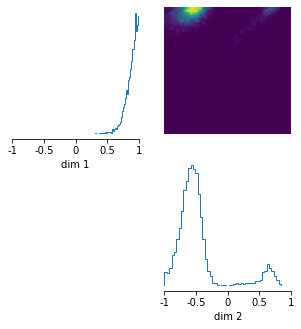

In [ ]:
fig, axes = analysis.pairplot(samples,
                           limits=[[-1, 1], [-1, 1]],
                        #    ticks=[[.5, 1], [.5, 15.]],
                           figsize=(5,5),
                        #    points=true_params,
                           points_offdiag={'markersize': 6},
                           points_colors='r');